Convolutional Neural Networks

In [1]:
# Run this!
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
print('keras using %s backend'%keras.backend.backend())
import matplotlib.pyplot as graph
import pandas as pd
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

keras using tensorflow backend


In [2]:
train_df = pd.read_csv('Data/train.csv')
# test_df = pd.read_csv('Data/test.csv')

In [3]:
train_df.shape

(42000, 785)

In [4]:
train_df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Linhas_Total = 42000; Linhas_60pct=25200; Linhas_20pct=8400;
# Linhas_20pct=8400
# train: 0~25199
# valid: 25200~33599
# test: 33600~41999
# Dividindo o set treinamento em 'train', 'validation' e 'test'
train_X = train_df.loc[:25199, train_df.columns != 'label']
train_Y = train_df.loc[:25199, train_df.columns == 'label']

valid_X = train_df.loc[25200:33599, train_df.columns != 'label']
valid_Y = train_df.loc[25200:33599, train_df.columns == 'label']

test_X = train_df.loc[33600:41999, train_df.columns != 'label']
test_Y = train_df.loc[33600:41999, train_df.columns == 'label']

In [6]:
print(train_X.shape)
print(train_Y.shape)
print(valid_X.shape)
print(valid_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(25200, 784)
(25200, 1)
(8400, 784)
(8400, 1)
(8400, 784)
(8400, 1)


In [7]:
# Redimensiona para 28x28
train_X = train_X.values.reshape(-1, 28, 28, 1)
valid_X = valid_X.values.reshape(-1, 28, 28, 1)
test_X = test_X.values.reshape(-1, 28, 28, 1)

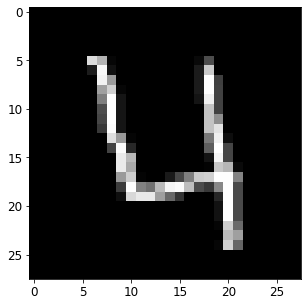

In [8]:
graph.imshow(train_X[3, :, :, 0]\
             , cmap='gray', interpolation='nearest')

In [9]:
# Normalização
train_X = train_X/255
valid_X = valid_X/255
test_X = test_X/255

In [10]:
# One-hot encoding - Utilizando a função 'to_categorical', para
# converter para binário e assim a rede neural entende como 
# categoria
train_Y = keras.utils.to_categorical(train_Y, 10)
valid_Y = keras.utils.to_categorical(valid_Y, 10)
test_Y = keras.utils.to_categorical(test_Y, 10)

print(train_Y[3])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [11]:
# Sets a randomisation seed for replicatability.
np.random.seed(6)

# Declara o objeto
model = Sequential()

In [12]:
# Pré-processamento feito pela rede neural
model.add(Conv2D(28, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(56, (3, 3), activation = 'relu'))

In [13]:
#
model.add(MaxPooling2D(pool_size = (2, 2)))

#
model.add(Dropout(0.125))

#
model.add(Flatten())

In [14]:
#
model.add(Dense(128, activation='relu'))

#
model.add(Dropout(0.25))

#
model.add(Dense(10, activation=tf.nn.softmax))

#
model.compile(loss='categorical_crossentropy', optimizer='Adamax',\
              metrics=['accuracy'])

In [15]:
#
training_stats = model.fit(train_X, train_Y, batch_size = 128,\
    epochs = 10, verbose = 1, validation_data = (valid_X, valid_Y))
# 
evaluation = model.evaluate(test_X, test_Y, verbose=0)
print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f'\
      %(evaluation[0], 100 * evaluation[1]))

Epoch 1/10
197/197 [==============================] - 33s 170ms/step - loss: 0.4332 - accuracy: 0.8672 - val_loss: 0.1706 - val_accuracy: 0.9485
Epoch 2/10
197/197 [==============================] - 34s 174ms/step - loss: 0.1503 - accuracy: 0.9558 - val_loss: 0.1003 - val_accuracy: 0.9695
Epoch 3/10
197/197 [==============================] - 35s 179ms/step - loss: 0.1040 - accuracy: 0.9685 - val_loss: 0.0781 - val_accuracy: 0.9769
Epoch 4/10
197/197 [==============================] - 36s 185ms/step - loss: 0.0787 - accuracy: 0.9766 - val_loss: 0.0648 - val_accuracy: 0.9812
Epoch 5/10
197/197 [==============================] - 36s 184ms/step - loss: 0.0661 - accuracy: 0.9803 - val_loss: 0.0608 - val_accuracy: 0.9812
Epoch 6/10
197/197 [==============================] - 37s 188ms/step - loss: 0.0518 - accuracy: 0.9838 - val_loss: 0.0576 - val_accuracy: 0.9820
Epoch 7/10
197/197 [==============================] - 37s 189ms/step - loss: 0.0450 - accuracy: 0.9860 - val_loss: 0.0533 - val_ac

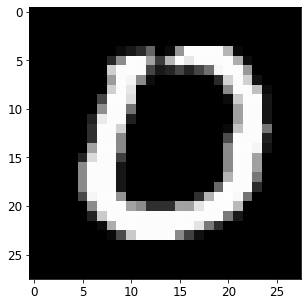

prediction: 0


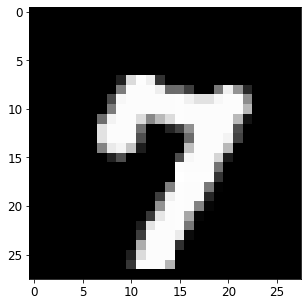

prediction: 7


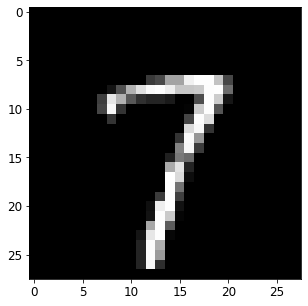

prediction: 7


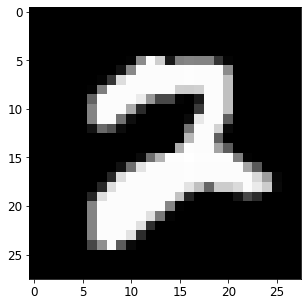

prediction: 2


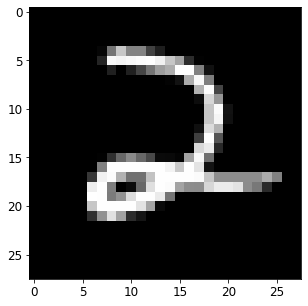

prediction: 2


In [16]:
# 
for i in range(5):
    sample = test_X[i].reshape(28, 28)
    ###

    graph.imshow(sample, cmap = 'gray', interpolation = 'nearest')
    graph.show()

    prediction = model.predict(sample.reshape(1, 28, 28, 1))
    print('prediction: %i' %(np.argmax(prediction)))